In [1]:
# Import Libraries
import numpy as np

from project_utils.bb_model import BB_Model
from project_utils.feature_stats import Feature_Statistics
from project_utils.feature_stats import Regression_Container





In [2]:
# Load Boston model

Boston_Data = BB_Model('Boston')

Boston_Data.df().head()

,crime_rate,zoned_lots,industry,by_river,NOX,avg_rooms,pre_1940,emp_distance,rad_access,tax_rate,pupil_tea_rat,low_status,median_value
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [3]:
Boston_Data.MPL()

-0.7383478087266093


MLPRegressor(random_state=RandomState(MT19937) at 0x1BFA5E91C40)

In [4]:
Boston_Data.Random_Forest()

0.9234845716103692


RandomForestRegressor(random_state=RandomState(MT19937) at 0x1BFA5E91C40)

In [5]:
print(Boston_Data.get_features())

['crime_rate', 'zoned_lots', 'industry', 'by_river', 'NOX', 'avg_rooms', 'pre_1940', 'emp_distance', 'rad_access', 'tax_rate', 'pupil_tea_rat', 'low_status']


In [6]:
# LIME Explanation for Training Data
from lime import lime_tabular

X_train, X_test, y_train, y_test = Boston_Data.get_TT_data()

LIME_Exp = lime_tabular.LimeTabularExplainer(training_data=X_train,
                                             mode=Boston_Data.get_mode(),
                                             #training_labels=None,
                                             feature_names=Boston_Data.get_features(),
                                             categorical_features=Boston_Data.get_catagorical(),
                                             #categorical_names=None,
                                             #kernel_width=None,
                                             #kernel=None,
                                             verbose=False,
                                             #class_names=None,
                                             #feature_selection='auto',
                                             discretize_continuous=False,
                                             #discretizer='quartile',
                                             sample_around_instance=True)
                                             #random_state=None,
                                             #training_data_stats=None)
        


In [7]:
# Generate explantion data for Random Forest

Boston_Stats = Feature_Statistics(feature_names = Boston_Data.get_features(), mode='regression')

for test_instance in range(X_test.shape[0]):

    data_row  = X_test[test_instance,:]
    
    explain_inst = LIME_Exp.explain_instance(data_row=data_row,
                                             predict_fn=Boston_Data.get_Random_Forest().predict,
                                             #labels=None,
                                             #top_labels=None,
                                             #num_features=10,
                                             num_samples=100,
                                             #distance_metric='euclidean',
                                             #model_regressor=None,
                                             sampling_method='gaussian')
    
    y_predict = Boston_Data.get_Random_Forest().predict(data_row.reshape(1, -1))

    print('INSTANCE: ', test_instance)
    
    Boston_Stats.Add_LIME_Sample(sample     = explain_inst.as_list(),
                                 outcome    = y_test[test_instance],
                                 prediction = y_predict)
    
    last_instance = test_instance

INSTANCE:  0
INSTANCE:  1
INSTANCE:  2
INSTANCE:  3
INSTANCE:  4
INSTANCE:  5
INSTANCE:  6
INSTANCE:  7
INSTANCE:  8
INSTANCE:  9
INSTANCE:  10
INSTANCE:  11
INSTANCE:  12
INSTANCE:  13
INSTANCE:  14
INSTANCE:  15
INSTANCE:  16
INSTANCE:  17
INSTANCE:  18
INSTANCE:  19
INSTANCE:  20
INSTANCE:  21
INSTANCE:  22
INSTANCE:  23
INSTANCE:  24
INSTANCE:  25
INSTANCE:  26
INSTANCE:  27
INSTANCE:  28
INSTANCE:  29
INSTANCE:  30
INSTANCE:  31
INSTANCE:  32
INSTANCE:  33
INSTANCE:  34
INSTANCE:  35
INSTANCE:  36
INSTANCE:  37
INSTANCE:  38
INSTANCE:  39
INSTANCE:  40
INSTANCE:  41
INSTANCE:  42
INSTANCE:  43
INSTANCE:  44
INSTANCE:  45
INSTANCE:  46
INSTANCE:  47
INSTANCE:  48
INSTANCE:  49
INSTANCE:  50
INSTANCE:  51
INSTANCE:  52
INSTANCE:  53
INSTANCE:  54
INSTANCE:  55
INSTANCE:  56
INSTANCE:  57
INSTANCE:  58
INSTANCE:  59
INSTANCE:  60
INSTANCE:  61
INSTANCE:  62
INSTANCE:  63
INSTANCE:  64
INSTANCE:  65
INSTANCE:  66
INSTANCE:  67
INSTANCE:  68
INSTANCE:  69
INSTANCE:  70
INSTANCE:  71
IN

In [8]:
Boston_Stats.Feature_Counts(max_features=8, scaled=True, threshold=0.075)

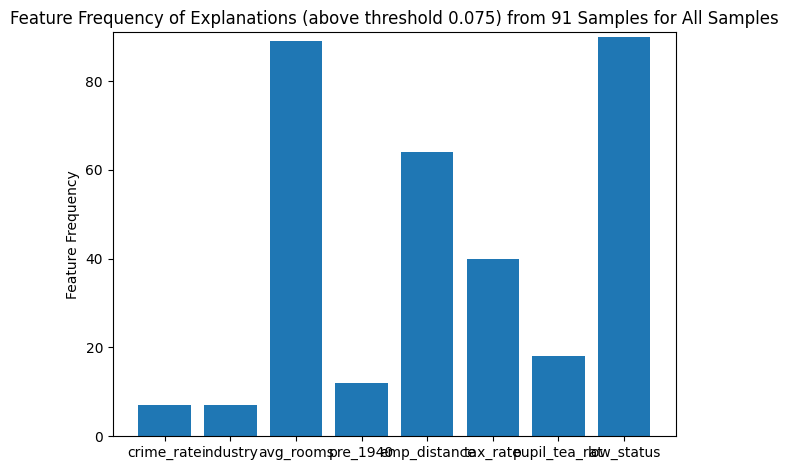

In [9]:
Boston_Stats.Frequency_Plot()

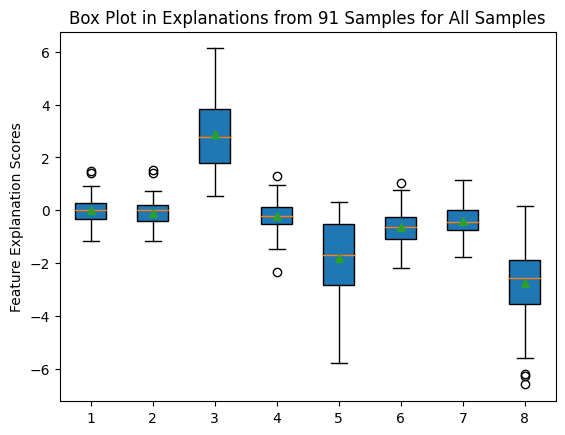

1 -      crime_rate
2 -      industry
3 -      avg_rooms
4 -      pre_1940
5 -      emp_distance
6 -      tax_rate
7 -      pupil_tea_rat
8 -      low_status


In [10]:
Boston_Stats.Box_Plot()

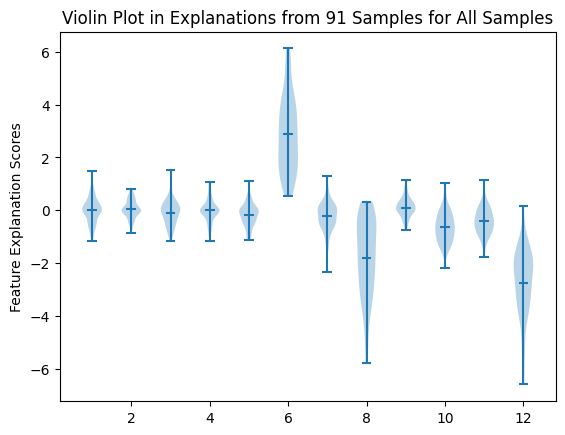

1 -      crime_rate
2 -      zoned_lots
3 -      industry
4 -      by_river
5 -      NOX
6 -      avg_rooms
7 -      pre_1940
8 -      emp_distance
9 -      rad_access
10 -     tax_rate
11 -     pupil_tea_rat
12 -     low_status


In [11]:
Boston_Stats.Violin_Plot(top_features=False)

In [12]:
Boston_Container = Regression_Container(Boston_Stats, 5)

Boston_Container.Feature_Counts(max_features=11, scaled=True, threshold=0.05)


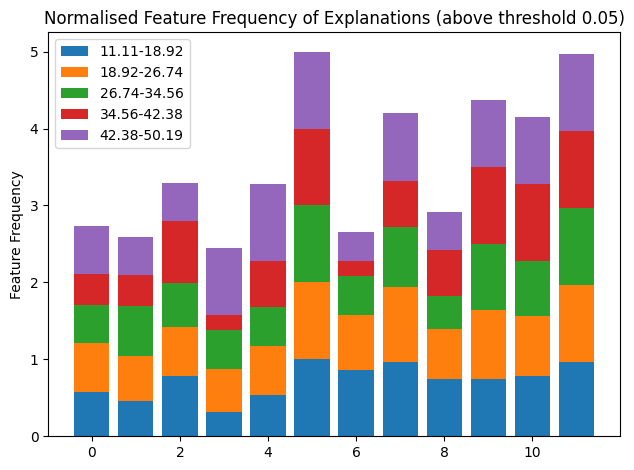

0 -      crime_rate
1 -      zoned_lots
2 -      industry
3 -      by_river
4 -      NOX
5 -      avg_rooms
6 -      pre_1940
7 -      emp_distance
8 -      rad_access
9 -     tax_rate
10 -     pupil_tea_rat
11 -     low_status


In [13]:
Boston_Container.Frequency_Plot()